# Linear Regression using PyTorch

## Preliminary Steps

In [1]:
import torch
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
%matplotlib inline

In [3]:
style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 6)

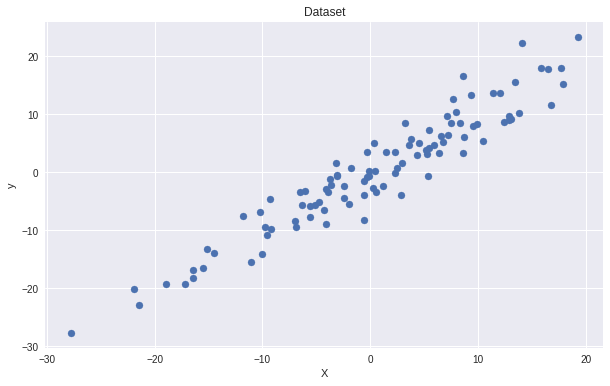

In [4]:
X = torch.randn(100, 1) * 10
y = X + torch.randn(100, 1) * 3

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Dataset')
plt.show()

## Building Model

In [5]:
class LinearRegression(torch.nn.Module):
    def __init__(self, input_features, output_features):
        super().__init__()
        self.linear = torch.nn.Linear(input_features, output_features)
        
    def forward(self, x):
        return self.linear(x)

In [6]:
torch.manual_seed(1)
model = LinearRegression(1, 1)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

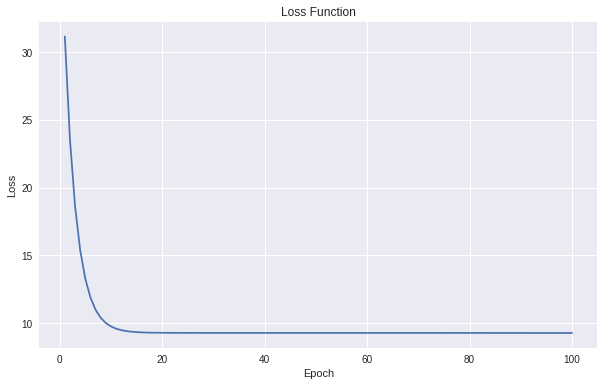

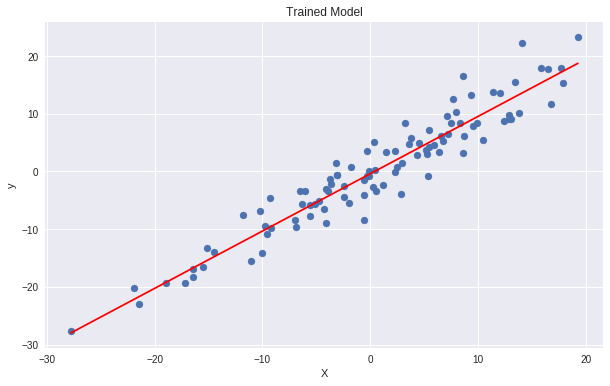

In [7]:
epochs = 100
losses = []

for i in range(epochs):
    y_pred = model.forward(X)
    
    loss = criterion(y_pred, y)
    losses.append(loss)
    loss.backward()
    
    optimizer.step()
    optimizer.zero_grad()

# Plot Loss function
plt.plot(range(1, epochs+1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Function')
plt.show()

# Plot Model
plt.scatter(X, y)
model_pred_x = torch.tensor([X.min(), X.max()]).view(2, 1)
model_pred = model.forward(model_pred_x).detach()
plt.plot(model_pred_x, model_pred, 'r')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Trained Model')
plt.show()